In [ ]:
import tensorflow as tf
import numpy as np
import random

In [ ]:
from tensorflow import keras

In [ ]:
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [47]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [39]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','bag','Ankle boot']
class_num=len(class_names)

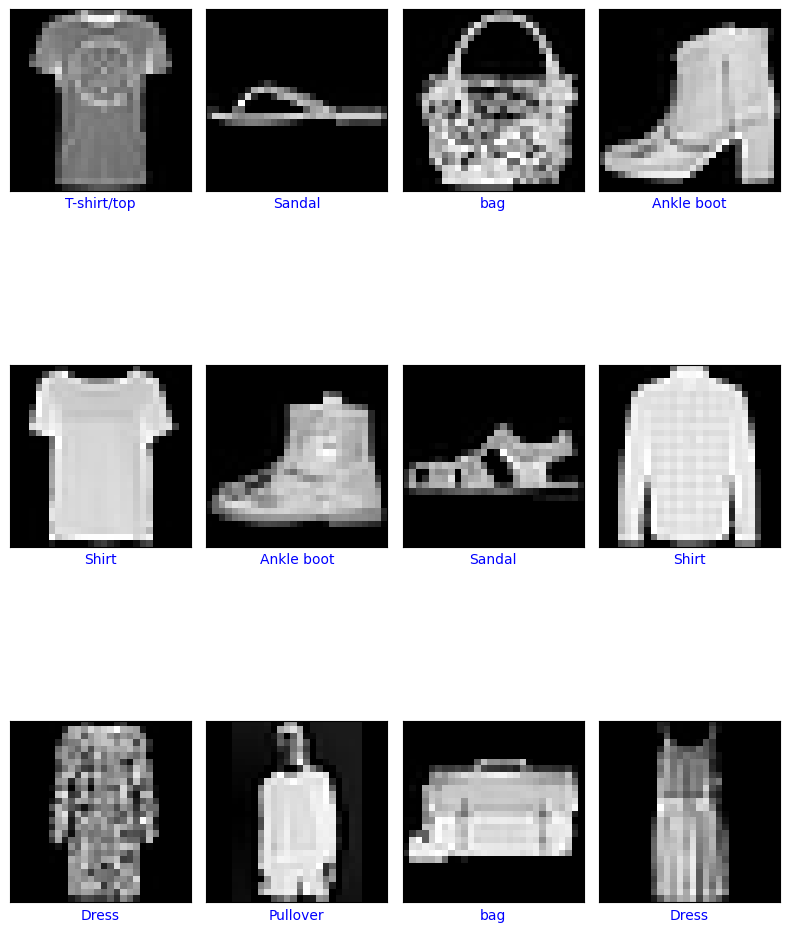

In [40]:
def plot_data(x_data:np.array,y_data:np.array):
    nrows,ncols=3,4
    len_x=x_data.shape[0]
    fig,pics=plt.subplots(nrows,ncols,figsize=(8,12))
    for itr in range(nrows*ncols):
        pic=pics[itr//ncols,itr%ncols]
        pic_idx=random.randint(0,len_x)
        pic.imshow(x_data[pic_idx],cmap='gray')
        pic.set(xticks=[],yticks=[])
        name=class_names[y_data[pic_idx]]
        pic.set_xlabel(name,color='blue',fontsize=10)
    plt.tight_layout()
    plt.show()
plot_data(x_train,y_train)    

In [17]:
x_train.shape

(60000, 28, 28, 1)

In [41]:
x_train=x_train.astype(np.float32)/255
x_test=x_test.astype(np.float32)/255


In [48]:
x_train=np.expand_dims(x_train,axis=-1)
x_train.shape


(60000, 28, 28, 1)

In [42]:

y_train_label = keras.utils.to_categorical(y_train, class_num)
y_test_label = keras.utils.to_categorical(y_test, class_num)

In [54]:

model=keras.models.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(512,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(class_num,activation='softmax')
                 ])


In [59]:
model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
history=model.fit(x_train,y_train_label,
                  epochs=10,
                  batch_size=256,
                  validation_split=0.1
                 )

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9096 - loss: 0.2554 - val_accuracy: 0.8743 - val_loss: 0.6654
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9120 - loss: 0.2507 - val_accuracy: 0.8732 - val_loss: 0.6305
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9103 - loss: 0.2746 - val_accuracy: 0.8820 - val_loss: 0.7248
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9126 - loss: 0.2527 - val_accuracy: 0.8637 - val_loss: 0.6779
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9135 - loss: 0.2507 - val_accuracy: 0.8818 - val_loss: 0.6595
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9157 - loss: 0.2535 - val_accuracy: 0.8760 - val_loss: 0.7263
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9116 - loss: 0.2542 - val_accuracy: 0.8810 - val_loss: 0.6383
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9170 - loss: 0.2388 - val_accu

In [69]:
history_dict=history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [70]:
train_loss,val_loss=history_dict['loss'],history_dict['val_loss']
train_acc,val_acc=history_dict['accuracy'],history_dict['val_accuracy']

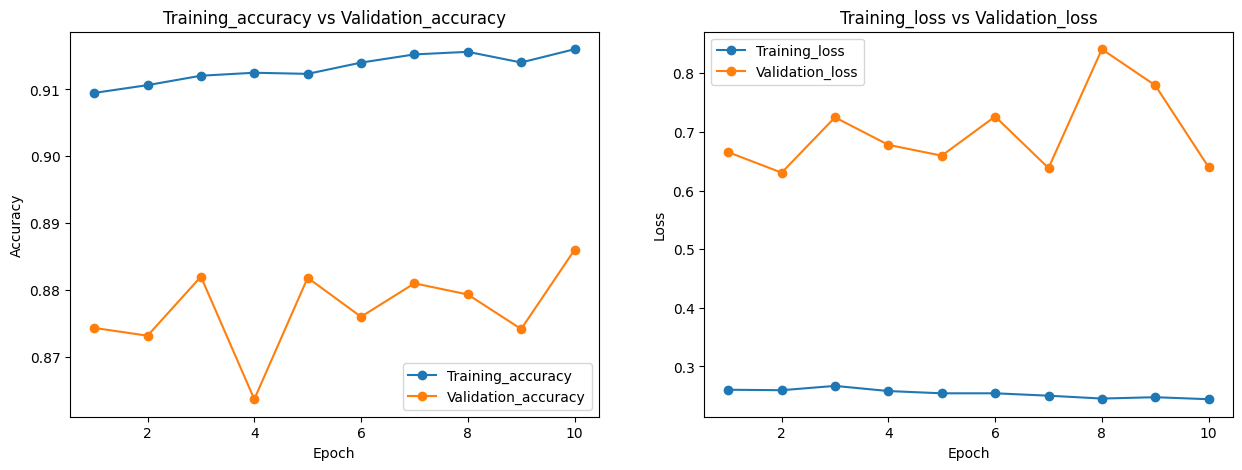

In [72]:
fig,(pic_1,pic_2)=plt.subplots(1,2,figsize=(15,5))
epochs=10
epoch_run=[i+1 for i in range(epochs)]
pic_1.plot(epoch_run,train_acc,label='Training_accuracy',marker='o')
pic_1.plot(epoch_run,val_acc,label='Validation_accuracy',marker='o')
pic_1.set(title='Training_accuracy vs Validation_accuracy',xlabel='Epoch',ylabel='Accuracy')
pic_1.legend()

pic_2.plot(epoch_run,train_loss,label='Training_loss',marker='o')
pic_2.plot(epoch_run,val_loss,label='Validation_loss',marker='o')
pic_2.set(title='Training_loss vs Validation_loss',xlabel='Epoch',ylabel='Loss')
pic_2.legend()

plt.show()

In [73]:
#Prediction


In [85]:
x_sample = x_test[0:10]
y_predict = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [86]:

predictions = np.argmax(y_predict, axis = 1)
predictions

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

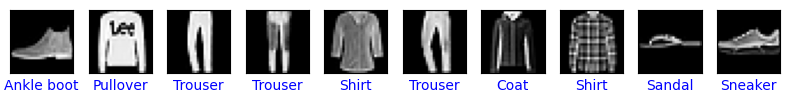

In [87]:
def plot_predict_data(x_data,y_data):
    num=x_data.shape[0]
    fig,pics=plt.subplots(1,num,figsize=(8,12))
    for itr in range(num):
        pic=pics[itr]
        pic.imshow(x_data[itr],cmap='gray')
        pic.set(xticks=[],yticks=[])
        name=class_names[y_data[itr]]
        pic.set_xlabel(name,color='blue',fontsize=10)
    plt.tight_layout()
    plt.show()
plot_predict_data(x_sample,predictions)